In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import matlib
from thresholding import*
import random
import re

In [2]:
df_sim = pd.read_csv(r'C:\Users\Invitado\Documents\Python\DS_MASTER\City_Adam_Intern\df_sim.csv')
df_sim['ids'] = list(zip(df_sim.ListingId_1, df_sim.ListingId_2))
df_full = pd.read_csv(r'C:\Users\Invitado\Documents\Python\DS_MASTER\City_Adam_Intern\merged_clean_df.csv')
df_full.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
def compare(df,id_1,id_2):
    #Compare URLS
    print(df['listing_url'][df['ListingId']==id_1])
    #print(df[df['ListingId']==id_1].values)
    print(df['listing_url'][df['ListingId']==id_2])
    #print(df[df['ListingId']==id_2].values)
    return 
compare(df_full,41709087,41339519)

15339    https://www.airbnb.nl/rooms/41709087
Name: listing_url, dtype: object
15209    https://www.airbnb.nl/rooms/41339519
Name: listing_url, dtype: object


In [4]:
sorted_dataset = scoring_unsupervised(df_sim)

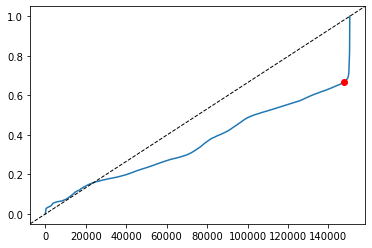

Knee of the curve is at index = 147708
Knee value = 0.6665915406733495


In [25]:
threshold,index = elbow_threshold(sorted_dataset) 

In [26]:
matches_score_weight, nonmatches_score_weight = unsupervised_labels(sorted_dataset,threshold)

In [30]:
columns = ['ids','agg_score','weights','uns_label']
uns_labels = matches_score_weight+nonmatches_score_weight
df_uns = pd.DataFrame(uns_labels,columns=columns)
df_uns 

,ids,agg_score,weights,uns_label
0,"(9451726, 35863069)",0.666592,0.000000,1.0
1,"(4276796, 26779777)",0.666600,0.000026,1.0
2,"(34050698, 2879050)",0.666625,0.000100,1.0
3,"(2247902, 16622510)",0.666629,0.000113,1.0
4,"(26418034, 22374354)",0.666633,0.000124,1.0
...,...,...,...,...
150593,"(20916514, 16747165)",0.666576,0.000024,0.0
150594,"(18746453, 13824148)",0.666578,0.000021,0.0
150595,"(9412502, 21760247)",0.666582,0.000014,0.0
150596,"(46369237, 46368959)",0.666586,0.000009,0.0


In [38]:
df_uns_label= df_sim.merge(df_uns,on='ids')
df_uns_label.to_csv('df_uns_label.csv',index=False)